In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models


In [3]:
mass_example = np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["mass"]
red_example = np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["redshift"]

In [4]:

def SHMR_plot(theta, mass_mat, red_mat, model_color):    # Create scatter plot
    plt.figure(figsize=(10, 8))

    mock_ind = np.random.randint(0, 100)
    halo_masses = np.linspace(10, 14, 100)
    stellar_mat = jsm_SHMR.general(theta, mass_mat, red_mat)
    theta_det = theta[:2] + [0, 0] + theta[4:]
    det = jsm_SHMR.general(theta_det, halo_masses, 0)
    sigma = theta[2] + theta[3] * (halo_masses - 12)
    stat_mock = jsm_stats.SatStats(stellar_mat[mock_ind], min_mass=6.5)

    # Distribution plot on the right

    star_bins = np.linspace(6.5,11.5,30)

    ax_right = plt.subplot2grid((3, 3), (0, 0), rowspan=2)
    ax_right.hist(stellar_mat[mock_ind].flatten(), bins=star_bins, orientation='horizontal', alpha=0.6, edgecolor="white", color=model_color)
    ax_right.invert_xaxis()
    ax_right.yaxis.tick_left()
    ax_right.set_ylim(6.5, 10)
    ax_right.set_xlim(600, 0)


    # Scatter plot
    ax_main = plt.subplot2grid((3, 3), (0, 1), rowspan=2, colspan=2)
    ax_main.set_title(f"$\\theta$ = {theta}", fontsize=15)
    ax_main.plot(halo_masses, det, color=model_color, label="deterministic", lw=2, zorder=1)
    ax_main.fill_between(halo_masses, det - sigma, det + sigma, color=model_color, alpha=0.6)
    ax_main.fill_between(halo_masses, det - 2 * sigma, det + 2 * sigma, color=model_color, alpha=0.3)

    ax_main.set_ylim(6.5, 10)
    ax_main.set_xlim(9.0, 12)
    ax_main.scatter(mass_mat[mock_ind], stellar_mat[mock_ind], marker=".", color="black", label=f"mock index: {mock_ind}")
    ax_main.legend()
    ax_main.set_ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
    ax_main.set_xlabel("log m$_{\mathrm{peak}}$ (M$_\odot$)", fontsize=15)

    # Create four smaller panels on the bottom row
    ax_bottom1 = plt.subplot2grid((3, 3), (2, 0))
    ax_bottom2 = plt.subplot2grid((3, 3), (2, 1))
    ax_bottom3 = plt.subplot2grid((3, 3), (2, 2))

    ax_bottom1.plot(np.arange(stat_mock.Pnsat.shape[0]), stat_mock.Pnsat, color="black", zorder=5)
    ax_bottom1.set_xlim(0, 35)
    ax_bottom1.set_xlabel("Nsat")

    ax_bottom2.plot(stat_mock.Msmax_sorted, stat_mock.ecdf_Msmax, color="black", zorder=5, label="max")
    ax_bottom2.plot(stat_mock.Mstot_sorted, stat_mock.ecdf_Mstot, color="black", ls="--", zorder=5, label="total")
    ax_bottom2.plot(stat_mock.Msave_sorted, stat_mock.ecdf_Msave, color="black", ls=":", zorder=5, label="mean")
    ax_bottom2.legend()

    #ax_bottom2.set_xlim(5, 11)
    ax_bottom2.set_xlabel("log Ms")

    ax_bottom3.axvline(jsm_stats.correlation_coef(stat_mock.satfreq, stat_mock.Msmax), color="black")
    ax_bottom3.set_xlabel("r (Nsat | max(Ms))")

    coef = []
    for i in stellar_mat:
        stat = jsm_stats.SatStats(i, min_mass=6.5)
        coef.append(jsm_stats.correlation_coef(stat.satfreq, stat.Msmax))
        ax_bottom1.plot(np.arange(stat.Pnsat.shape[0]), stat.Pnsat, color=model_color, alpha=0.1)
        ax_bottom2.plot(stat.Msmax_sorted, stat.ecdf_Msmax, color=model_color, alpha=0.1)

    binz = np.linspace(-0.5,1,25)
    ax_bottom3.hist(coef, bins=binz,alpha=0.7, edgecolor="white", color=model_color)
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()


In [5]:
# def SHMR_plot(theta, mass_mat, red_mat,model_color):
#     # Create a figure with a grid layout
#     fig = plt.figure(figsize=(15, 10))
#     gs = gridspec.GridSpec(2, 5, height_ratios=[2, 1])

#     mock_ind = np.random.randint(0, 100)
#     halo_masses = np.linspace(8, 12, 100)
#     stellar_mat = jsm_SHMR.general(theta, mass_mat, red_mat)
#     theta_det = theta[:2] + [0, 0] + theta[4:]
#     det = jsm_SHMR.general(theta_det, halo_masses, 0)
#     sigma = theta[2] + theta[3] * (halo_masses - 12)
#     stat_mock = jsm_stats.SatStats(stellar_mat[mock_ind], min_mass=6.5)

#     # Create your long plot on top
#     ax_top = plt.subplot(gs[0, :4])
#     ax_top.set_title(f"$\\theta$ = {theta}", fontsize=15)
#     ax_top.plot(halo_masses, det, color=model_color, label="deterministic", lw=2, zorder=1)
#     ax_top.fill_between(halo_masses, det - sigma, det + sigma, color=model_color, alpha=0.6)
#     ax_top.fill_between(halo_masses, det - 2 * sigma, det + 2 * sigma, color=model_color, alpha=0.3)

#     ax_top.set_ylim(6.5, 10)
#     ax_top.set_xlim(9.0, 12)
#     ax_top.scatter(mass_mat[mock_ind], stellar_mat[mock_ind], marker=".", color="black", label=f"mock index: {mock_ind}")
#     ax_top.legend()

#     # Create three smaller plots on the bottom
#     ax_bottom1 = plt.subplot(gs[1, 0])
#     ax_bottom1.plot(np.arange(stat_mock.Pnsat.shape[0]), stat_mock.Pnsat, color="black", zorder=5)
#     ax_bottom1.set_xlim(0, 35)
#     ax_bottom1.set_xlabel("Nsat")

#     ax_bottom2 = plt.subplot(gs[1, 1])
#     ax_bottom2.plot(stat_mock.Msmax_sorted, stat_mock.ecdf_Msmax, color="black", zorder=5)
#     ax_bottom2.set_xlim(4, 11)
#     ax_bottom2.set_xlabel("log max(Ms)")

#     ax_bottom3 = plt.subplot(gs[1, 2])
#     ax_bottom3.plot(stat_mock.Mstot_sorted, stat_mock.ecdf_Mstot, color="black", zorder=5)
#     ax_bottom3.set_xlim(4, 11)
#     ax_bottom3.set_xlabel("log total(Ms)")

#     ax_bottom4 = plt.subplot(gs[1, 3])
#     ax_bottom4.axvline(jsm_stats.correlation_coef(stat_mock.satfreq, stat_mock.Msmax), color="black")
#     ax_bottom4.set_xlabel("r (Nsat | max(Ms))")

#     coef = []
#     for i in stellar_mat:
#         stat = jsm_stats.SatStats(i, min_mass=6.5)
#         coef.append(jsm_stats.correlation_coef(stat.satfreq, stat.Msmax))
#         ax_bottom1.plot(np.arange(stat.Pnsat.shape[0]), stat.Pnsat, color=model_color, alpha=0.1)
#         ax_bottom2.plot(stat.Msmax_sorted, stat.ecdf_Msmax, color=model_color, alpha=0.1)
#         ax_bottom3.plot(stat.Mstot_sorted, stat.ecdf_Mstot, color=model_color, alpha=0.1)


#     binz = np.linspace(-0.5,1,25)
#     ax_bottom4.hist(coef, bins=binz,alpha=0.7, edgecolor="white", color=model_color)
#     plt.show()

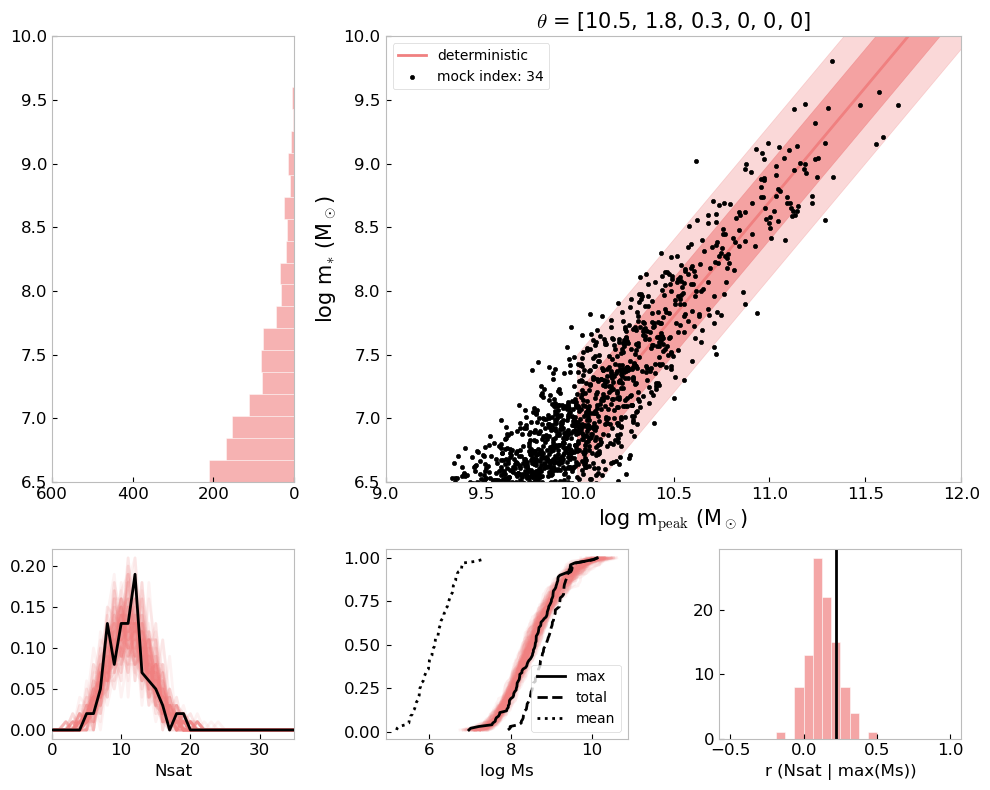

In [6]:
theta1 = [10.5, 1.8, 0.3, 0, 0, 0]

SHMR_plot(theta1, mass_example, red_example, model_color="lightcoral")

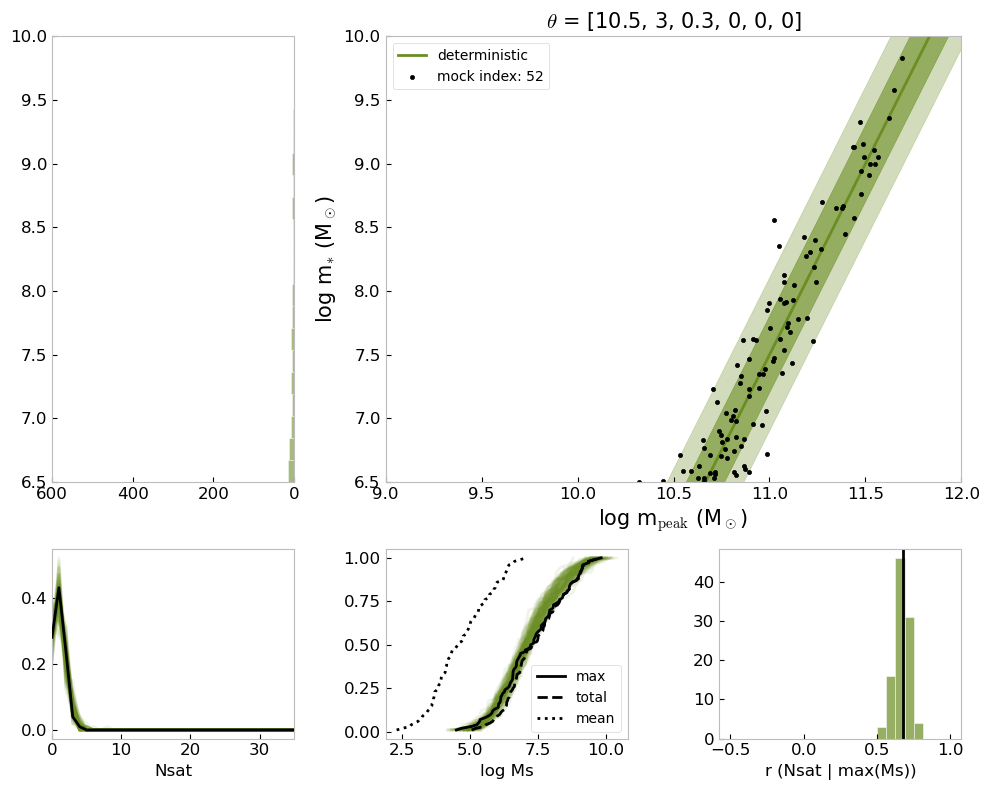

In [7]:
theta2 = [10.5, 3, 0.3, 0, 0, 0]

SHMR_plot(theta2, mass_example, red_example, model_color="olivedrab")

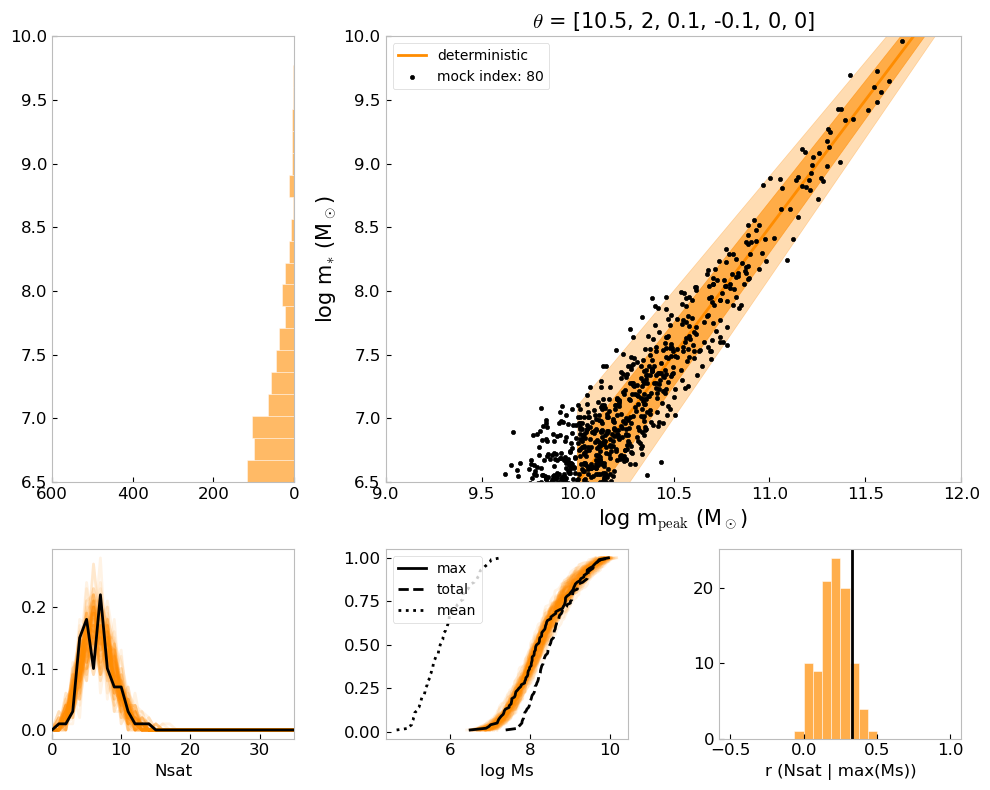

In [8]:
theta3 = [10.5, 2, 0.1, -0.1, 0, 0]

SHMR_plot(theta3, mass_example, red_example, model_color="darkorange")

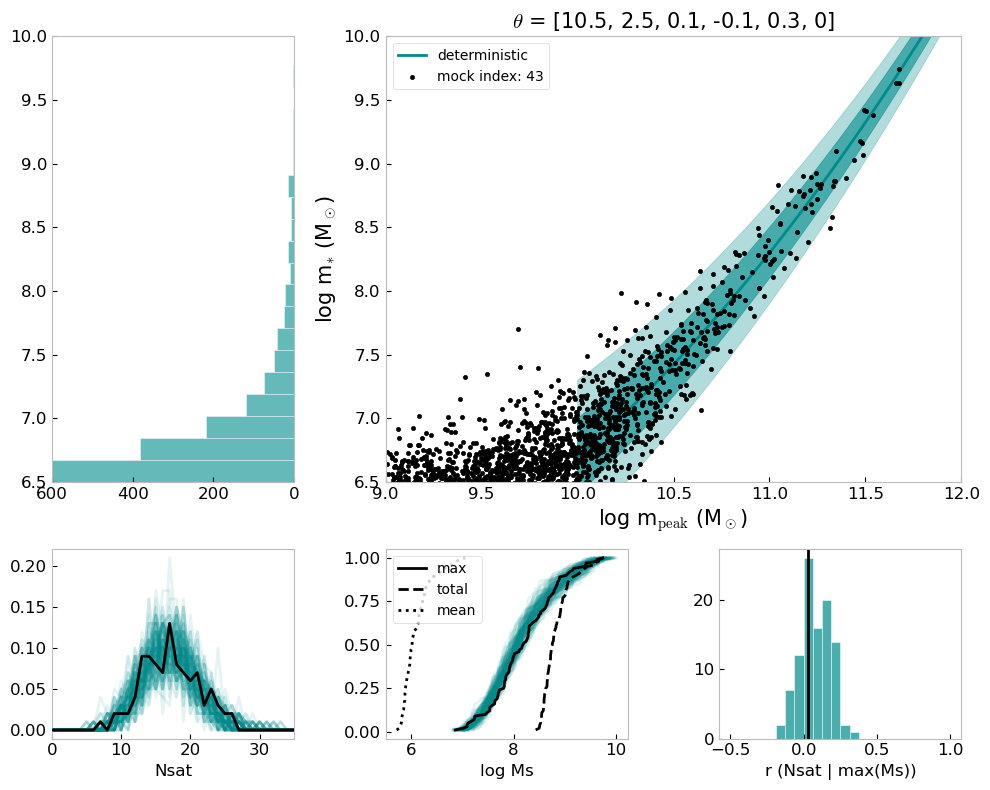

In [9]:
theta4 = [10.5, 2.5, 0.1, -0.1, 0.3, 0]

SHMR_plot(theta4, mass_example, red_example, model_color="darkcyan")

In [10]:
coef1 = []
for i in range(99):
    lgMs = jsm_SHMR.general(theta1, mass_example[i], red_example[i])
    stat = jsm_stats.SatStats(lgMs, min_mass=6.5)
    r = jsm_stats.correlation_coef(stat.satfreq, stat.Msave)
    coef1.append(r)

coef2 = []
for i in range(99):
    lgMs = jsm_SHMR.general(theta2, mass_example[i], red_example[i])
    stat = jsm_stats.SatStats(lgMs, min_mass=6.5)
    r = jsm_stats.correlation_coef(stat.satfreq, stat.Msave)
    coef2.append(r)

coef3 = []
for i in range(99):
    lgMs = jsm_SHMR.general(theta3, mass_example[i], red_example[i])
    stat = jsm_stats.SatStats(lgMs, min_mass=6.5)
    r = jsm_stats.correlation_coef(stat.satfreq, stat.Msave)
    coef3.append(r)

coef4 = []
for i in range(99):
    lgMs = jsm_SHMR.general(theta4, mass_example[i], red_example[i])
    stat = jsm_stats.SatStats(lgMs, min_mass=6.5)
    r = jsm_stats.correlation_coef(stat.satfreq, stat.Msave)
    coef4.append(r)


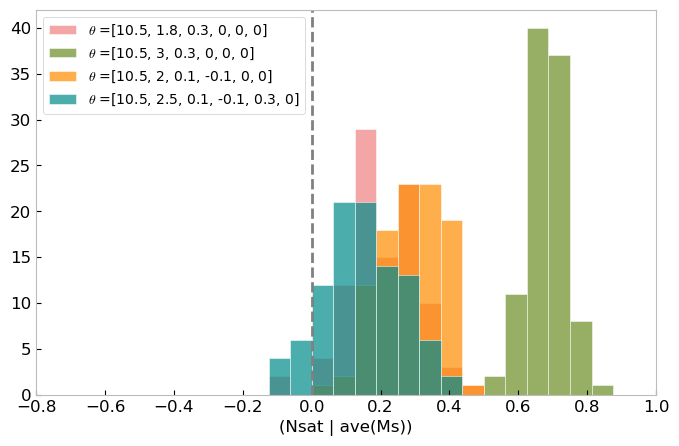

In [11]:
binz = np.linspace(-0.5,1,25)

plt.figure(figsize=(8,5))
plt.hist(coef1, bins=binz,alpha=0.7, edgecolor="white", label=f"$\\theta$ ={theta1}", color="lightcoral")
plt.hist(coef2, bins=binz,alpha=0.7, edgecolor="white", label=f"$\\theta$ ={theta2}", color="olivedrab")
plt.hist(coef3, bins=binz,alpha=0.7, edgecolor="white", label=f"$\\theta$ ={theta3}", color="darkorange")
plt.hist(coef4, bins=binz,alpha=0.7, edgecolor="white", label=f"$\\theta$ ={theta4}", color="darkcyan")
plt.axvline(0.0, color="grey", ls="--")
plt.xlim(-0.8, 1)
plt.xlabel("(Nsat | ave(Ms))")
plt.legend(loc=2, framealpha=1)
plt.show()

In [12]:
coef1 = []
for i in range(99):
    lgMs = jsm_SHMR.general(theta1, mass_example[i], red_example[i])
    stat = jsm_stats.SatStats(lgMs, min_mass=6.5)
    r = jsm_stats.correlation_coef(stat.satfreq, stat.Msmax)
    coef1.append(r)

coef2 = []
for i in range(99):
    lgMs = jsm_SHMR.general(theta2, mass_example[i], red_example[i])
    stat = jsm_stats.SatStats(lgMs, min_mass=6.5)
    r = jsm_stats.correlation_coef(stat.satfreq, stat.Msmax)
    coef2.append(r)

coef3 = []
for i in range(99):
    lgMs = jsm_SHMR.general(theta3, mass_example[i], red_example[i])
    stat = jsm_stats.SatStats(lgMs, min_mass=6.5)
    r = jsm_stats.correlation_coef(stat.satfreq, stat.Msmax)
    coef3.append(r)

coef4 = []
for i in range(99):
    lgMs = jsm_SHMR.general(theta4, mass_example[i], red_example[i])
    stat = jsm_stats.SatStats(lgMs, min_mass=6.5)
    r = jsm_stats.correlation_coef(stat.satfreq, stat.Msmax)
    coef4.append(r)


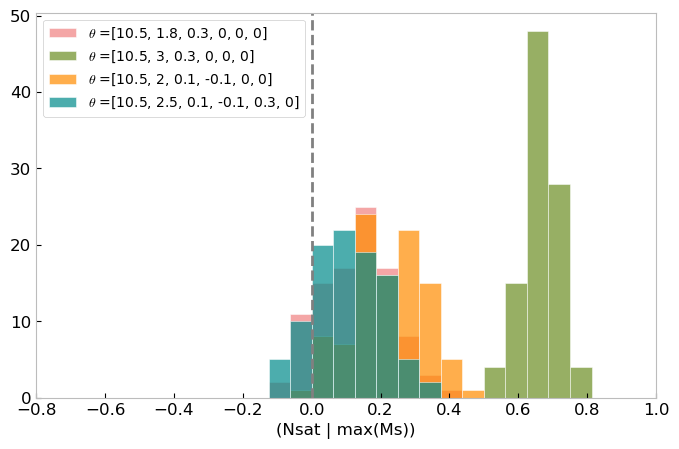

In [13]:
binz = np.linspace(-0.5,1,25)

plt.figure(figsize=(8,5))
plt.hist(coef1, bins=binz,alpha=0.7, edgecolor="white", label=f"$\\theta$ ={theta1}", color="lightcoral")
plt.hist(coef2, bins=binz,alpha=0.7, edgecolor="white", label=f"$\\theta$ ={theta2}", color="olivedrab")
plt.hist(coef3, bins=binz,alpha=0.7, edgecolor="white", label=f"$\\theta$ ={theta3}", color="darkorange")
plt.hist(coef4, bins=binz,alpha=0.7, edgecolor="white", label=f"$\\theta$ ={theta4}", color="darkcyan")
plt.axvline(0.0, color="grey", ls="--")
plt.xlim(-0.8, 1)
plt.xlabel("(Nsat | max(Ms))")
plt.legend(loc=2, framealpha=1)
plt.show()